## Financial Payment Services Fraud Detection Analysis

### Data Science & Machine Learning

#### Arunava Kumar Chakraborty

This Data Science assignment presents a Machine Learning-based predictive approach to explore the given **Fraud** CSV dataset. The Dataset has been uploaded in my Kaggle repository (www.kaggle.com/arunavakrchakraborty/financial-payment-services-fraud-data).

I have Proposed an experimental approach to develop a Fraud detection model to predict future Fraud cases based on the other features. The best feature variables need to be selected on the basis of their linear relationships. Furthermore, the following ML-based models will be developed to build the predictive system.
- **Linear Regression**
- **Logistic Regression**
- **K-Nearest Neighbors**
- **Decision Tree** 
- **AdaBoost Tree**

The models will be trained using the training data and predict the fraud caused from the test data to identify the fraudulent customer. The best-performing model will be selected as the final model for preparing the predictive system.

## 1. Importing Packages

Here, required Python packages have been imported for the analysis.

- The **pandas**, **numpy** packages are required for basic analysis.
- The **matplotlib**, **seaborn**, **yellowbrick** packages are used for visualization purpose.
- The **statsmodels** package is required to perform the statistical analysis of the data.
- The **sklearn** package is used for importing machine learning models for regression analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 2. Load Datasets

In this section, the given dataset **Fraud.csv** has been loaded into the pandas dataframe.

In [2]:
fraud_df = pd.read_csv("Fraud.csv")
fraud_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## 3. Data Pre-processing

In order to prepare the data for the predictive analysis, the dataset needs to be pre-processed at the initial phase of the experiment. The entire pre-processing of the data mainly consists of the following phases -
- **Missing Values Removal -** In this phase we will search for the missing values from the dataset.
- **Outliers Removal -** In this section all the outliers from the numerical columns will be identified and removed from the dataset.
- **Multi-collinearity Removal -** In this phase all the Multi-collinearity will be identified and removed for the datasets after calculating the difference values of the respective features.

### 3.1. Missing Values Removal

In [4]:
fraud_df.isnull().mean()*100

step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64

During the analysis, no missing values have been found from the dataset.

### 3.2. Outliers Removal

#### 3.2.1. Outliers fromf Amount of the Transaction

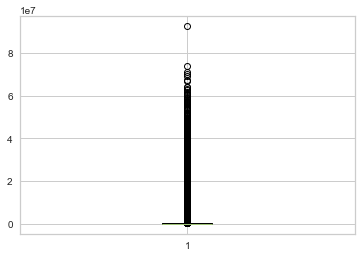

In [5]:
plt.boxplot(fraud_df['amount'])
plt.show()

In [6]:
fraud_df.query('amount>80000000')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3686583,276,TRANSFER,92445516.64,C1715283297,0.0,0.0,C439737079,9595.98,92455112.62,0,0


In [7]:
indexNames = fraud_df[fraud_df['amount'] > 80000000].index
fraud_df.drop(indexNames , inplace=True)

During the analysis, one outlier has been found for the **amount** feature with a value of greater than 80000000. The outlier has been removed from the dataset.

#### 3.2.2. Outliers from Initial Balance Before the Transaction

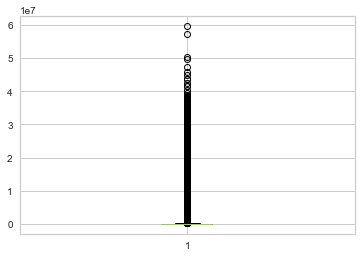

In [8]:
plt.boxplot(fraud_df['oldbalanceOrg'])
plt.show()

In [9]:
fraud_df.query('oldbalanceOrg>50000000')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5996399,425,TRANSFER,10000000.0,C40489106,59585040.37,49585040.37,C650095152,0.0,0.0,1,0
6281474,646,TRANSFER,10000000.0,C590657619,50399045.08,40399045.08,C1971187430,0.0,0.0,1,0
6362452,730,TRANSFER,10000000.0,C726730575,57316255.05,47316255.05,C1364745638,0.0,0.0,1,0


In [10]:
indexNames = fraud_df[fraud_df['oldbalanceOrg'] > 50000000].index
fraud_df.drop(indexNames , inplace=True)

During the analysis, three outliers have been found for the **oldbalanceOrg** feature with a value of greater than 50000000. The outliers have been removed from the dataset.

#### 3.2.3. Outliers from New Balance After the Transaction

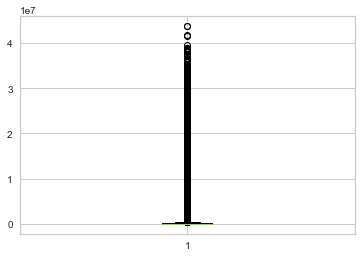

In [11]:
plt.boxplot(fraud_df['newbalanceOrig'])
plt.show()

In [12]:
fraud_df.query('newbalanceOrig>40000000')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4180200,304,PAYMENT,8301.85,C1568160039,41699144.49,41690842.64,M1906748245,0.00,0.00,0,0
4180201,304,CASH_OUT,258483.17,C438977024,41690842.64,41432359.46,C1162702437,6449276.06,6707759.23,0,0
4203639,305,CASH_OUT,132238.97,C559275248,43818855.30,43686616.33,C1114436169,5327024.57,5459263.54,0,0
4203640,305,PAYMENT,12814.12,C2080486364,43686616.33,43673802.21,M928977012,0.00,0.00,0,0


In [13]:
indexNames = fraud_df[fraud_df['newbalanceOrig'] > 40000000].index
fraud_df.drop(indexNames , inplace=True)

During the analysis, four outliers have been found for the **newbalanceOrig** feature with a value of greater than 40000000. The outliers have been removed from the dataset.

#### 3.2.4. Outliers from Initial Balance Recipient Before the Transaction

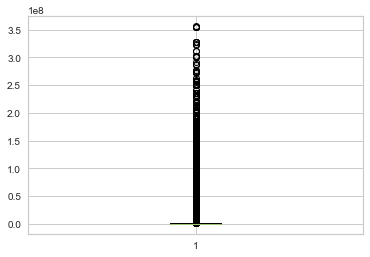

In [14]:
plt.boxplot(fraud_df['oldbalanceDest'])
plt.show()

In [15]:
fraud_df.query('oldbalanceDest>350000000')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4596803,328,CASH_IN,171982.69,C758787020,31748.00,203730.69,C439737079,3.555534e+08,3.553814e+08,0,0
4721497,332,CASH_IN,195896.55,C494525103,4178494.78,4374391.33,C439737079,3.553814e+08,3.551855e+08,0,0
5380607,376,CASH_OUT,194946.47,C4896808,0.00,0.00,C439737079,3.551855e+08,3.553805e+08,0,0
5486389,380,TRANSFER,635405.82,C1666289749,0.00,0.00,C439737079,3.553805e+08,3.560159e+08,0,0
5920180,404,CASH_OUT,163389.56,C1323053481,0.00,0.00,C439737079,3.560159e+08,3.561793e+08,0,0


In [16]:
indexNames = fraud_df[fraud_df['oldbalanceDest'] > 350000000].index
fraud_df.drop(indexNames , inplace=True)

During the analysis, Five outliers have been found for the **oldbalanceDest** feature with a value of greater than 350000000. The outliers have been removed from the dataset.

#### 3.2.5. Outliers from New Balance Recipient After the Transaction

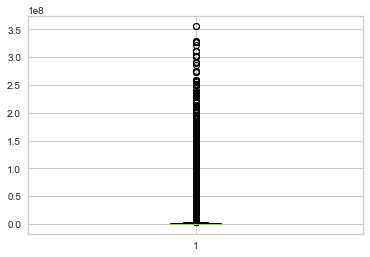

In [17]:
plt.boxplot(fraud_df['newbalanceDest'])
plt.show()

In [18]:
fraud_df.query('newbalanceDest>350000000')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4124250,302,TRANSFER,3325263.90,C1812458696,0.0,0.0,C439737079,3.215898e+08,355553416.3,0,0
4133583,302,TRANSFER,30638354.89,C1800693711,0.0,0.0,C439737079,3.249151e+08,355553416.3,0,0


In [19]:
indexNames = fraud_df[fraud_df['newbalanceDest'] > 350000000].index
fraud_df.drop(indexNames , inplace=True)

During the analysis, two outliers have been found for the **newbalanceDest** feature with a value of greater than 350000000. The outliers have been removed from the dataset.

In [20]:
fraud_df['isFraud'].unique()

array([0, 1])

In [21]:
fraud_df['isFlaggedFraud'].unique()

array([0, 1])

In [22]:
fraud_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### 3.3. Multi-collinearity Removal

In [23]:
num_fraud_df = fraud_df[['step', 'amount', 'oldbalanceOrg',
                         'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
                         'isFraud', 'isFlaggedFraud']]
num_fraud_df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0


#### 3.3.1. Identify Multi-collinearity

In [24]:
X = num_fraud_df[list(num_fraud_df)]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
3,547.616120,newbalanceOrig
2,545.307261,oldbalanceOrg
5,83.919587,newbalanceDest
4,72.236866,oldbalanceDest
1,4.078319,amount
0,1.191735,step
6,1.188005,isFraud
7,1.002548,isFlaggedFraud


#### 3.3.1. Remove Multi-collinearity

In [25]:
num_fraud_df['balanceOrigDiff'] = num_fraud_df['newbalanceOrig'] - num_fraud_df['oldbalanceOrg']
num_fraud_df['balanceDestDiff'] = num_fraud_df['newbalanceDest'] - num_fraud_df['oldbalanceDest']

final_df = num_fraud_df.drop(['newbalanceOrig', 'oldbalanceOrg', 'newbalanceDest', 'oldbalanceDest'], axis=1)

final_df.head()

,step,amount,isFraud,isFlaggedFraud,balanceOrigDiff,balanceDestDiff
0,1,9839.64,0,0,-9839.64,0.0
1,1,1864.28,0,0,-1864.28,0.0
2,1,181.00,1,0,-181.00,0.0
3,1,181.00,1,0,-181.00,-21182.0
4,1,11668.14,0,0,-11668.14,0.0


During the analysis, two multi-collinearity have been found i.e. -
- **newbalanceOrig** vs. **oldbalanceOrg**
- **newbalanceDest** vs. **oldbalanceDest**

The difference between these attributes has been calculated and the attributes have been removed from the dataset.

## 4. Exploratory Data Analysis

In this section, the average amount of each category of amount payment has been calculated to understand the payment flow.

In [26]:
amount_fraud_df = fraud_df.groupby(['type'])[['amount']].mean()
amount_fraud_df = amount_fraud_df.reset_index()
amount_fraud_df.head()

,type,amount
0,CASH_IN,168920.220537
1,CASH_OUT,176273.944698
2,DEBIT,5483.665314
3,PAYMENT,13057.606984
4,TRANSFER,910364.274711


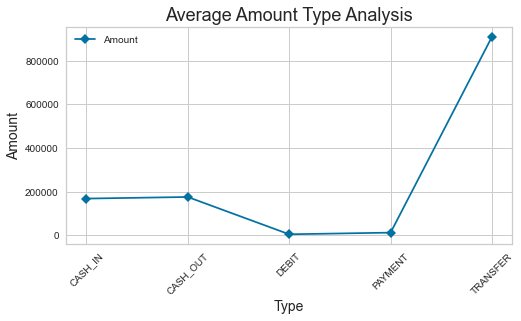

In [27]:
x = amount_fraud_df.loc[:, 'type']
y1 = amount_fraud_df['amount']

plt.figure(figsize = (8, 4))

plt.plot(x, y1, marker='D', label = 'Amount')

plt.xlabel('Type', fontsize = 14)
plt.ylabel('Amount', fontsize = 14)
plt.title('Average Amount Type Analysis', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=45)
plt.show()

During the analysis, it has been found that the maximum amount has been transferred from one account to another one.

## 5. Predictive Analysis [Regression Models]

### 5.1. Correlation of Features

In this phase of analysis, the correlations have been evaluated to measure the dependencies between the feature variables and the fraud data. The correlations represent the relationships between the variables in terms of statistical analysis. The linear relationships between the two variables have been defined by the covariance matrix.

In [28]:
final_df_corr = final_df.corr()
final_df_corr

,step,amount,isFraud,isFlaggedFraud,balanceOrigDiff,balanceDestDiff
step,1.000000,0.022392,0.031551,0.003277,-0.007182,0.001317
amount,0.022392,1.000000,0.076651,0.012321,-0.102135,0.845748
isFraud,0.031551,0.076651,1.000000,0.044117,-0.362041,0.027070
isFlaggedFraud,0.003277,0.012321,0.044117,1.000000,-0.000230,-0.000243
balanceOrigDiff,-0.007182,-0.102135,-0.362041,-0.000230,1.000000,-0.169693
balanceDestDiff,0.001317,0.845748,0.027070,-0.000243,-0.169693,1.000000


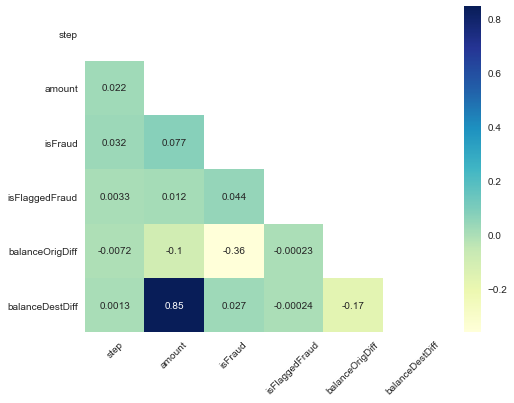

In [29]:
mask = np.triu(np.ones_like(final_df_corr, dtype=bool))
plt.figure(figsize=(8,6))
sns.heatmap(final_df_corr,annot=True, mask = mask, cmap=plt.cm.YlGnBu)
plt.xticks(rotation=45)
plt.show()

The key factors to predict fraudulent customers are as follows -
- **amount -** If the amount is high then there will be a higher risk of fraud.
- **balanceOrigDiff -** The difference between the **newbalanceOrig** and **oldbalanceOrg**. A higher amount will increase the risk of fraud.
- **balanceDestDiff -** The difference between the **newbalanceDest** and **oldbalanceDest**. A higher amount will increase the risk of fraud. 

### 5.2. Train-Test-Val Split

The fraud data will be divided into X and y sets based on the feature variables and the target variable. The X set contains all the independent variables whereas the y set contains the dependent variable **isFraud**. The X and y sets have been divided into **80:20** ratio i.e. **80%** of data can be used for **training** purpose and **20%** of data can be used for **testing** purpose.

In [30]:
X = final_df.drop(['isFraud'], axis=1)
y = final_df['isFraud']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5090084, 5) (1272521, 5) (5090084,) (1272521,)


### 5.3 Regression Models

In order to build the predictive model, the machine learning-based regressors have been trained based on the training data and tested the performance using the test data. The best regressor will be selected on the basis of their prediction performance.

The prediction error has been analyzed for all the regression models to understand the model accuracy on the corresponding dataset. The regression lines for the true and predicted target labels have been plotted in a 2D scatterplot to understand how much the predicted line is close to the original line throughout the plane. The minimum distance between these two lines denotes more accuracy of the respective model.

#### 5.3.1 Linear Regression Model

In [32]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [33]:
lin_reg_model.predict(X_test)

array([ 0.0046351 ,  0.00819356,  0.00086774, ...,  0.00353546,
        0.0031226 , -0.00612435])

In [34]:
lin_reg_model_score = lin_reg_model.score(X_test, y_test)
lin_reg_model_accuracy = round(lin_reg_model_score*100, 2)
print("The prediction accuracy of Linear Regression model is "+ str(lin_reg_model_accuracy)+"%")

The prediction accuracy of Linear Regression model is 14.57%


In [35]:
print ('Coefficients: ', lin_reg_model.coef_)
print ('Intercept: ',lin_reg_model.intercept_)

Coefficients:  [ 6.02692562e-06  1.43558560e-08  9.32596312e-01 -9.25361706e-08
 -1.06484582e-08]
Intercept:  0.0005313645551160207


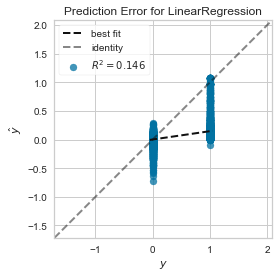

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [36]:
visualizer = PredictionError(lin_reg_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show() 

#### 5.3.2 KNN Regression Model

In [37]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [38]:
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

In [39]:
knn_model_score = knn_model.score(X_test, y_test)
knn_model_accuracy = round(knn_model_score*100, 2)
print("The prediction accuracy of KNN model is "+ str(knn_model_accuracy)+"%")

The prediction accuracy of KNN model is 48.7%


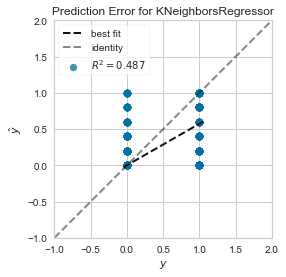

<AxesSubplot:title={'center':'Prediction Error for KNeighborsRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [40]:
visualizer = PredictionError(knn_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

#### 5.3.3 Decision Tree Regression Model

In [41]:
dtree_model = DecisionTreeRegressor()
dtree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [42]:
dtree_model.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [43]:
dtree_model_score = dtree_model.score(X_test, y_test)
dtree_model_accuracy = round(dtree_model_score*100, 2)
print("The prediction accuracy of Decision Tree model is "+ str(dtree_model_accuracy)+"%")

The prediction accuracy of Decision Tree model is 39.74%


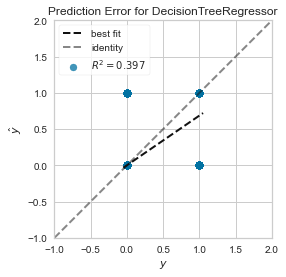

<AxesSubplot:title={'center':'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [44]:
visualizer = PredictionError(dtree_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

#### 5.3.4 AdaBoost Regression Model

In [45]:
adaboost_model = AdaBoostRegressor()
adaboost_model.fit(X_train, y_train)

AdaBoostRegressor()

In [46]:
adaboost_model.predict(X_test)

array([0.00066887, 0.00066887, 0.00066887, ..., 0.00066887, 0.00066887,
       0.00066887])

In [47]:
adaboost_model_score = adaboost_model.score(X_test, y_test)
adaboost_model_accuracy = round(adaboost_model_score*100, 2)
print("The prediction accuracy of AdaBoost model is "+ str(adaboost_model_accuracy)+"%")

The prediction accuracy of AdaBoost model is 41.72%


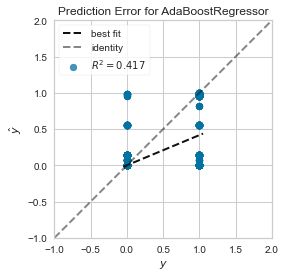

<AxesSubplot:title={'center':'Prediction Error for AdaBoostRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [48]:
visualizer = PredictionError(adaboost_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

#### 5.3.5 Random Forest Regression Model

In [49]:
rforest_model = RandomForestRegressor(random_state=42, max_leaf_nodes=50, n_estimators=100,
                                   bootstrap=True, n_jobs=-1, oob_score=True)
rforest_model.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=50, n_jobs=-1, oob_score=True,
                      random_state=42)

In [50]:
rforest_model.predict(X_test)

array([0.00028681, 0.00028681, 0.00028681, ..., 0.00028681, 0.00028681,
       0.00028681])

In [51]:
rforest_model_score = rforest_model.score(X_test, y_test)
rforest_model_accuracy = round(rforest_model_score*100, 2)
print("The prediction accuracy of Random Forest model is "+ str(rforest_model_accuracy)+"%")

The prediction accuracy of Random Forest model is 59.78%


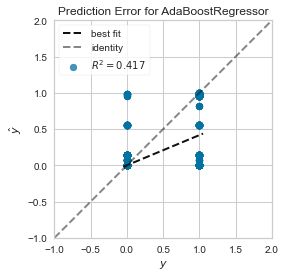

<AxesSubplot:title={'center':'Prediction Error for AdaBoostRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [52]:
visualizer = PredictionError(adaboost_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

### 5.4 Regression Model Performance Analysis

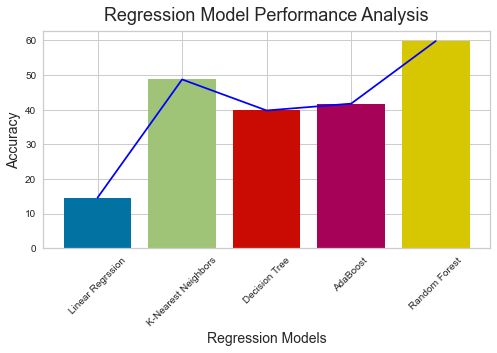

In [53]:
plt.figure(figsize = (8,4))
accuracy_dict = {'Linear Regrssion' : lin_reg_model_accuracy,
                 'K-Nearest Neighbors' : knn_model_accuracy,
                 'Decision Tree' : dtree_model_accuracy,
                 'AdaBoost' : adaboost_model_accuracy,
                 'Random Forest' : rforest_model_accuracy}
for k, v in accuracy_dict.items():
    plt.bar(k,v)
plt.plot(list(accuracy_dict.values()), color = 'blue')
plt.title(r'Regression Model Performance Analysis', fontsize=18, pad=10)
plt.xlabel('Regression Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=45)
plt.show()

During regression analysis, five ML-based regression models have achieved significant prediction accuracy on the test data. It has been found that the **Random Forest** model achieved the highest **59.78%** prediction accuracy for predicting the fraud customers based on the respective features.

The Final predictive model has been developed based on the **Random Forest** model. Although, it is necessary to improve the model performance by optimizing the hyperparameters so that the proposed model will help to identify the fraudulent customers.

#### Future Scope 
In the future, a web application can be developed based on this predictive system for analyzing customer data to predict whether the customer is fraudulent or not. The web-based system will display the predicted outcome through its user interface. After the deployment of the web-based system in the server, the user of the predictive system need not to be concerned about the backend analysis. It will further help to implement an abstraction between the user and developer levels.